In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.sparse import issparse

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.5 pynndescent==0.5.10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
results_file = 'write/CoreAnalyzedData.h5ad'

In [3]:
adata = sc.read_h5ad('local.h5ad')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 584944 × 28024
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [5]:
metadata = pd.DataFrame({
    'Donor ID': adata.obs['donor_id'],
    'Age': adata.obs['age_or_mean_of_age_range'],
    'Sex': adata.obs['sex'],
    'BMI': adata.obs['BMI'],
    'Cause of Death': adata.obs['cause_of_death'],
    'Mixed Ancestry': adata.obs['mixed_ancestry'],
    'Self-Reported Ethnicity': adata.obs['self_reported_ethnicity_ontology_term_id']
})

metadata.to_csv("coremetadata.csv", index=False)

In [6]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [ ]:
plt.hist(adata.obs['n_genes_by_counts'], bins=50)
plt.xlabel('Number of genes')
plt.ylabel('Number of cells')
plt.title('Number of genes per cell')
plt.show()

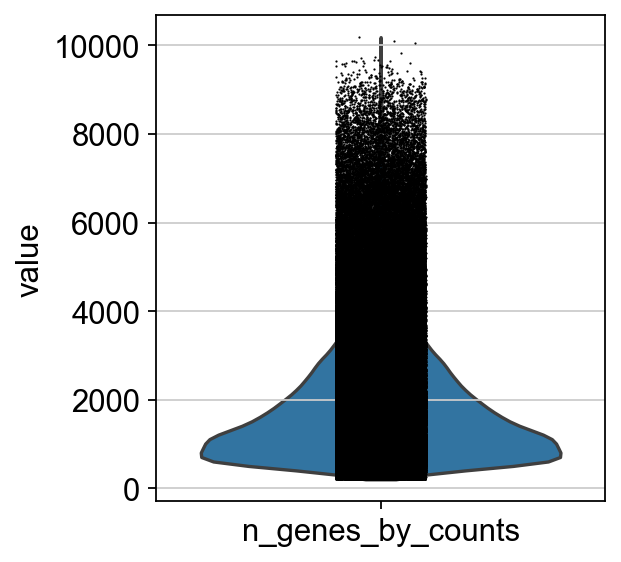

In [7]:
sc.pl.violin(adata, 'n_genes_by_counts')

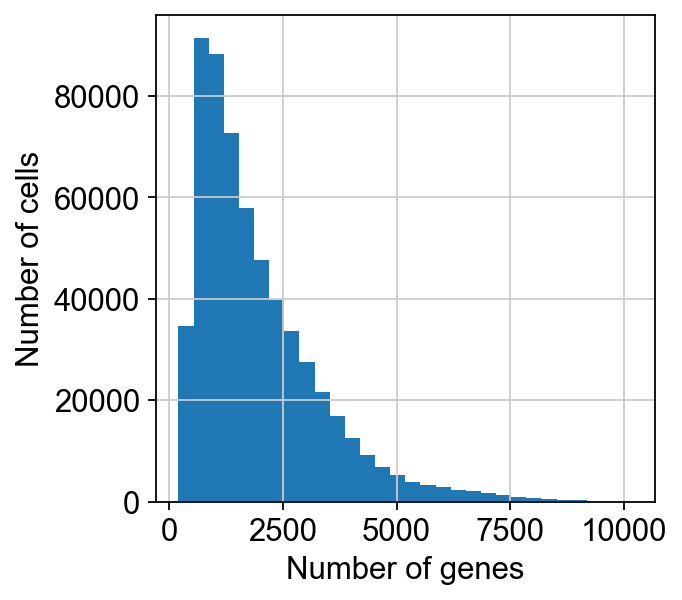

In [8]:
num_genes_per_cell = (adata.X > 0).sum(axis=1)

# Create a histogram
plt.hist(num_genes_per_cell, bins=30)
plt.xlabel('Number of genes')
plt.ylabel('Number of cells')
plt.show()

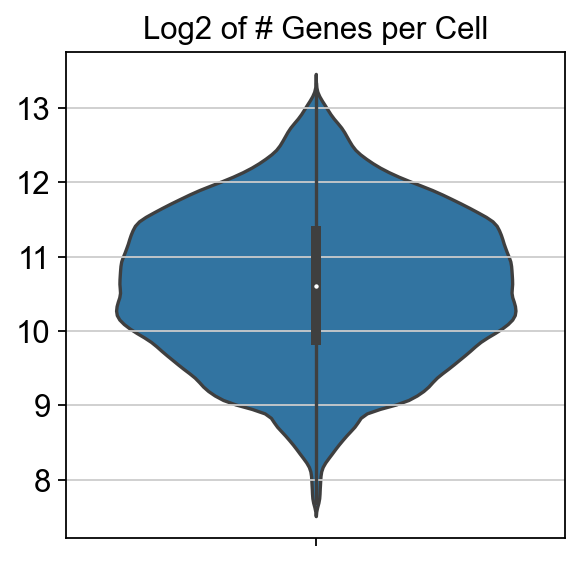

In [8]:
import seaborn as sns

# Calculate the number of genes (non-zero entries) for each cell
num_genes_per_cell = np.sum(adata.X > 0, axis=1)

# Calculate log2 of the number of genes, adding a small constant to avoid log2(0)
log_num_genes_per_cell = np.log2(num_genes_per_cell + 1)

# Create a violin plot
sns.violinplot(y=log_num_genes_per_cell)
plt.title('Log2 of # Genes per Cell')
plt.show()

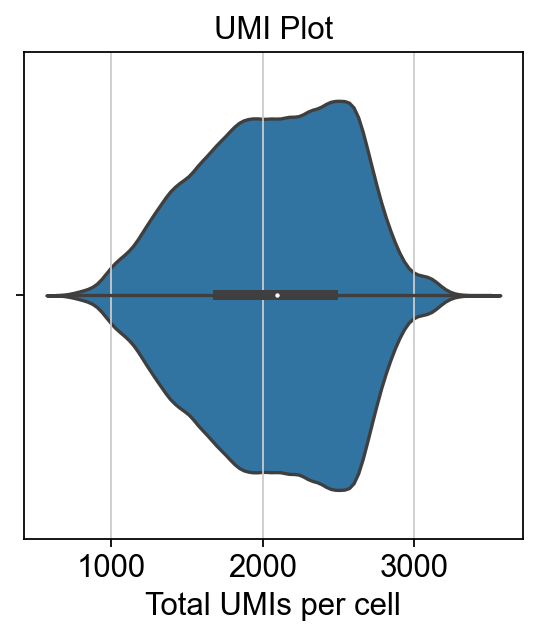

In [9]:
# Total count (UMI) per cell
total_counts_per_cell = np.sum(adata.X, axis=1)

# Create a violin plot
sns.violinplot(x=total_counts_per_cell)
plt.xlabel('Total UMIs per cell')
plt.title('UMI Plot')
plt.show()

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
adata.var['mt'] = adata.var_names.str.startswith('mt-')

num_mt_genes = adata.var['mt'].sum()
print("Number of mitochondrial genes:", num_mt_genes)

"""
mito_counts_per_cell = np.sum(adata.X[:, adata.var['mt']], axis=1)

# Percentage of counts that are mitochondrial
percentage_mito = mito_counts_per_cell / total_counts_per_cell * 100

# Create a violin plot
sns.violinplot(x=percentage_mito)
plt.xlabel('Percentage of mitochondrial counts')
plt.show()
"""

Number of mitochondrial genes: 0


"\nmito_counts_per_cell = np.sum(adata.X[:, adata.var['mt']], axis=1)\n\n# Percentage of counts that are mitochondrial\npercentage_mito = mito_counts_per_cell / total_counts_per_cell * 100\n\n# Create a violin plot\nsns.violinplot(x=percentage_mito)\nplt.xlabel('Percentage of mitochondrial counts')\nplt.show()\n"

In [ ]:
print("Total number of genes: ", adata.var_names.shape[0])

# Print the gene names
print("Gene names: ", adata.var_names)

In [11]:
# Convert the gene names to a list and then a DataFrame
gene_names_df = pd.DataFrame(adata.var_names.tolist(), columns=['Gene Names'])

# Save the DataFrame to a CSV file
gene_names_df.to_csv('gene_names.csv', index=False)

In [12]:
# Compute the counts for the mitochondrial genes
mito_counts = adata[:, adata.var["mt"].values].X.sum(axis=1)

# Compute the total counts per cell
total_counts = adata.X.sum(axis=1)

# Calculate the percentage of counts in mitochondrial genes
adata.obs['percent_mito'] = mito_counts / total_counts * 100

# You may also want to log transform the total counts
adata.obs['log_counts'] = np.log(total_counts + 1)  # Adding 1 to avoid log(0)

print(adata.obs)

                        suspension_type  \
GCGACCATCCCTAACC_SC22              cell   
P2_1_GCGCAACCAGTTAACC              cell   
GCTCTGTAGTGCTGCC_SC27              cell   
P2_8_TTAGGACGTTCAGGCC              cell   
CTTGATTGTCAGTTTG_T164              cell   
...                                 ...   
ACCTTTACATTAACCG_T120              cell   
CATTATCTCCATGAAC_F01639            cell   
AGGCCGTGTGTGACCC-SC56              cell   
CGATGGCAGCAGGCTA-1-2               cell   
AATCGGTGTCGGCACT-1-4               cell   

                                                                  donor_id  \
GCGACCATCCCTAACC_SC22    homosapiens_None_2023_None_sikkemalisa_001_d10...   
P2_1_GCGCAACCAGTTAACC    homosapiens_None_2023_None_sikkemalisa_001_d10...   
GCTCTGTAGTGCTGCC_SC27    homosapiens_None_2023_None_sikkemalisa_001_d10...   
P2_8_TTAGGACGTTCAGGCC    homosapiens_None_2023_None_sikkemalisa_001_d10...   
CTTGATTGTCAGTTTG_T164    homosapiens_None_2023_None_sikkemalisa_001_d10...   
...            

In [ ]:
print(adata.var)

In [13]:
adata.layers["raw"] = adata.X.copy()  # preserve the raw counts
sc.pp.normalize_total(adata, target_sum=1e4)  # normalize the counts
sc.pp.log1p(adata)  # log transform
adata.raw = adata  # keep the normalized and log transformed data

normalizing counts per cell
    finished (0:00:11)


In [ ]:
num_cells_raw = adata.layers["raw"].shape[0]
print(f"Number of cells in raw counts: {num_cells_raw}")

# In normalized counts
num_cells_norm = adata.X.shape[0]
print(f"Number of cells in normalized counts: {num_cells_norm}")

In [ ]:
num_genes_expressed = np.sum(adata.X > 0, axis=1)

# Find the minimum number of expressed genes in any cell
min_num_genes_expressed = np.min(num_genes_expressed)

print(f"Minimum number of genes expressed in any cell: {min_num_genes_expressed}")

In [ ]:
print(adata.obs_names)
print(adata.var_names)

In [14]:
# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)

# Log transform the data
#  sc.pp.log1p(adata) apparently already done??? || check article

normalizing counts per cell
    finished (0:00:07)
